In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmasher as cmr

In [8]:
class reflow:
    def __init__(self, h, k):
        x = np.arange(0, 150, 1).reshape(1, -1).repeat(150, axis=0)
        y = np.arange(0, 150, 1).reshape(-1, 1)[::-1, :].repeat(150, axis=1)
        loc = [75, 149]
        self.distance = np.sqrt(np.absolute(x - loc[0]) ** 2 + np.absolute(y - loc[1]) ** 2)
        self.reflow_dis = np.arange(0, 150, 1).reshape(-1, 1)[::-1, :].repeat(150, axis=1)
        
        self.init_d = np.ones([150, 150]) * 5
        self.ref_t = np.zeros([1, 150])
        
        self.reflow_h = h   # 偵測位置
        self.reflow_k = k   # 限制最大
    
    def get_init_pad(self):
        return self.init_d
    
    def reflow(self, flow):
        f = flow[self.reflow_h, :]
#         f = np.clip(f, a_max=self.reflow_k, a_min=0)
        self.ref_t += f
        x = self.reflow_dis < self.ref_t
        return x
    
    def flow_go(self, t):
        x = self.distance < t
        y = self.reflow(x)
        x = x * self.init_d + (y * 2)
        return x
        

In [9]:
water_data = []
water = reflow(149, 10)
for i in range(200):
    c = water.flow_go(i)
    water_data.append(c)

<IPython.core.display.Javascript object>


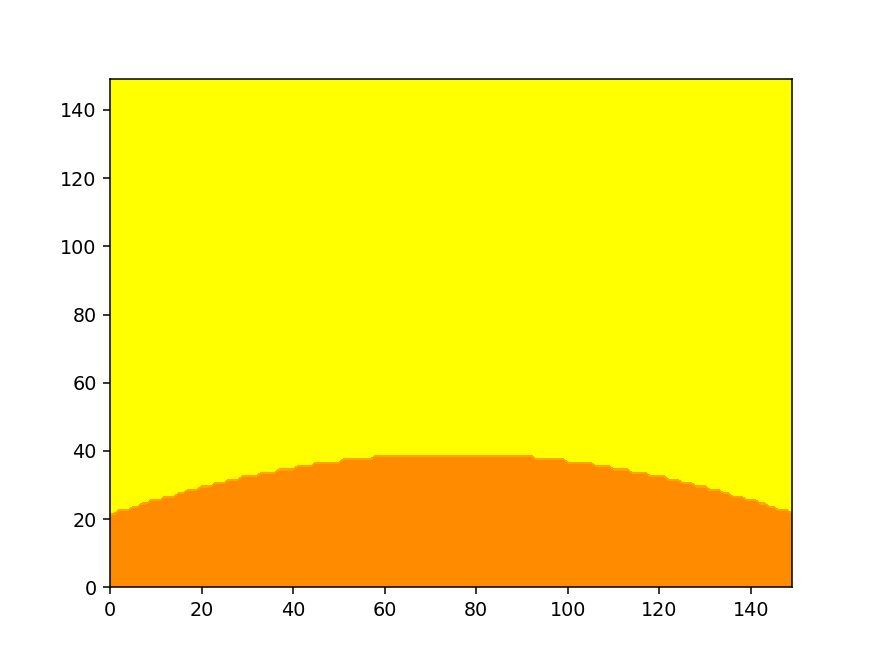

In [37]:
%matplotlib notebook

fig, ax = plt.subplots()

# cmap = mpl.cm.cool
# norm = mpl.colors.Normalize(vmin=0, vmax=20)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmaps), cax=ax)

def animate(i):
    d = water_data[i]
#     ax.contourf(d[::-1, :], cmap = mpl.colormaps['Reds'], vmin=0, vmax=10)
    im = ax.contourf(d[::-1, :], cmap = cmaps, vmin=0, vmax=10)
    
ani = FuncAnimation(fig, animate, 200, interval = 0.1)

In [11]:
cdict= ["#FFFFFF","#98F5FF","#87CEEB","#00FF00",\
        "#008B00","#FFFF00","#FFA500","#FF8C00",\
        "#FF0000","#AF0000","#8B0000","#FF00FF",\
        "#8A2BE2","#360CF9"]



In [12]:
from matplotlib import cm, colors
cmaps = colors.ListedColormap(cdict,'indexed')

In [27]:
from matplotlib import cm, colors

cdict= ["#FFFFFF","#98F5FF","#87CEEB","#00FF00",\
        "#FFFF00","#FFA500","#FF8C00",\
        "#FF0000","#AF0000"]

cmaps = colors.ListedColormap(cdict,'indexed')

<IPython.core.display.Javascript object>


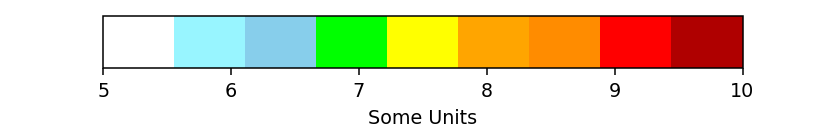

In [28]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmaps),
             cax=ax, orientation='horizontal', label='Some Units')

# nice

In [ ]:
class reflow:
    def __init__(self, size, reflow_h, reflow_k):
        self.reflow_dis = np.arange(0, 150, 1).reshape(-1, 1)[::-1, :].repeat(150, axis=1)
        self.ref_t = np.zeros([1, 150])
        
        self.reflow_h = reflow_h   # 偵測位置
        self.reflow_k = reflow_k   # 限制最大
    
    def reflow(self, flow):
        f = flow[self.reflow_h, :]
#         f = np.clip(f, a_max=self.reflow_k, a_min=0)
        self.ref_t += f
        x = self.reflow_dis < self.ref_t
        return x
        